# Group cells via the MaxEnt couplings

In [1]:
import numpy as np
import scipy.io
from matplotlib import pyplot as plt
import pickle

# load the couplings
data_path = '../../data/matlab_data/'
maxent_model = scipy.io.loadmat(data_path+'model_rtpairwise_notconverged.mat')

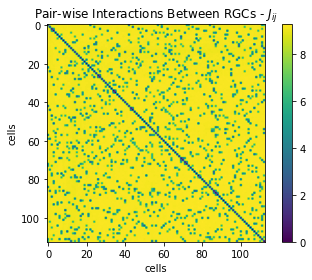

In [35]:
ncell = maxent_model['model'][0][0][0][0][0]
model_type = maxent_model['model'][0][0][1][0]
nrepeats = maxent_model['model'][0][0][2][0][0]
nframes = maxent_model['model'][0][0][3][0][0]
factors = maxent_model['model'][0][0][4][0]
step_scaling = maxent_model['model'][0][0][5][0]
# z = maxent_model['model'][0][0][6][0][0]
# model_entropy = maxent_model['model'][0][0][7][0][0]

# visualize the factors
h = factors[:ncell]
J = np.zeros((ncell, ncell))

m = 0
for i in range(ncell):
    for j in range(i+1, ncell):
        J[i,j] = factors[ncell+m]
        J[j,i] = J[i,j]
        m += 1

# for i in range(ncell):
#     J[i,i] = np.mean(J[:,i])
    
plt.figure(figsize=(6,4))
plt.imshow(J)
plt.colorbar()
plt.xlabel('cells')
plt.ylabel('cells')
_ = plt.title('Pair-wise Interactions Between RGCs - $J_{ij}$')

In [96]:
# threshold = 9.23
threshold = 9.23

In [97]:
cells_remaining = list(range(ncell))
groups = []

while len(cells_remaining) > 1:
    curr_group = []
    curr_cell = cells_remaining[0]
    curr_group.append(curr_cell)
    cells_remaining.remove(curr_cell)
    temp = np.array(list(enumerate(np.abs(J[curr_cell]))))[cells_remaining]
    couple = int(temp[np.argmax(temp[:,1]), 0])
    
    while len(cells_remaining) > 1 and np.abs(J[curr_cell, couple]) > threshold:  
        curr_group.append(couple)
        cells_remaining.remove(couple)
        curr_cell = couple
        temp = np.array(list(enumerate(np.abs(J[curr_cell]))))[cells_remaining]
        couple = int(temp[np.argmax(temp[:,1]), 0])
    
    groups.append(curr_group)

In [98]:
print('num groups:', len(groups))
for i in range(len(groups)):
    print('group #', i, ':', len(groups[i]))

num groups: 66
group # 0 : 1
group # 1 : 1
group # 2 : 1
group # 3 : 1
group # 4 : 1
group # 5 : 1
group # 6 : 1
group # 7 : 1
group # 8 : 1
group # 9 : 1
group # 10 : 1
group # 11 : 1
group # 12 : 1
group # 13 : 1
group # 14 : 1
group # 15 : 1
group # 16 : 1
group # 17 : 1
group # 18 : 1
group # 19 : 1
group # 20 : 1
group # 21 : 1
group # 22 : 1
group # 23 : 1
group # 24 : 1
group # 25 : 1
group # 26 : 1
group # 27 : 19
group # 28 : 3
group # 29 : 9
group # 30 : 1
group # 31 : 1
group # 32 : 1
group # 33 : 1
group # 34 : 1
group # 35 : 1
group # 36 : 2
group # 37 : 1
group # 38 : 1
group # 39 : 1
group # 40 : 1
group # 41 : 2
group # 42 : 1
group # 43 : 1
group # 44 : 1
group # 45 : 11
group # 46 : 1
group # 47 : 1
group # 48 : 1
group # 49 : 1
group # 50 : 2
group # 51 : 1
group # 52 : 1
group # 53 : 1
group # 54 : 2
group # 55 : 1
group # 56 : 1
group # 57 : 1
group # 58 : 2
group # 59 : 1
group # 60 : 1
group # 61 : 1
group # 62 : 3
group # 63 : 1
group # 64 : 2
group # 65 : 1


In [103]:
# save the group members for the first (large) groups
large_size = 8
groups_large = []
for i in range(len(groups)):
    if len(groups[i]) > large_size:
        groups_large.append(groups[i])

print(len(groups_large), [len(group) for group in groups_large])

with open('cell_groups_rtpairwise.pkl', 'wb') as file:
    pickle.dump(groups_large, file)

# code to load the groups from pickle file
# with open('cell_groups_pairwise.pkl', 'rb') as file:
#     cell_groups = pickle.load(file)

3 [19, 9, 11]


## Another slightly different method of going in a loop of couplings

In [6]:
# # go in a loop and group cells
# cells_remaining = list(range(ncell))
# groups = []

# while len(cells_remaining) > 1:
#     curr_group = []
#     curr_cell = cells_remaining[0]
#     curr_group.append(curr_cell)
#     cells_remaining.remove(curr_cell)
#     couple = np.argmax(np.abs(J[curr_cell]))
    
#     while len(cells_remaining) > 1 and np.abs(J[curr_cell, couple]) > threshold and couple in cells_remaining:  
#         curr_group.append(couple)
#         cells_remaining.remove(couple)
#         curr_cell = couple
#         couple = np.argmax(np.abs(J[curr_cell]))
    
#     groups.append(curr_group)

In [7]:
# print('num groups:', len(groups))
# for i in range(len(groups)):
#     print('group #', i, ':', len(groups[i]))